In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True)

In [3]:
data = boston.frame
data.columns = boston.feature_names + ['Price']

In [4]:
print("Data shape:", data.shape)

Data shape: (506, 14)


In [5]:
print("Feature names:", boston.feature_names)


Feature names: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [6]:
print(data.head(10))

      CRIM    ZN  INDUS CHAS    NOX     RM    AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575   65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421   78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185   61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998   45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147   54.2  6.0622   3  222.0     18.7   
5  0.02985   0.0   2.18    0  0.458  6.430   58.7  6.0622   3  222.0     18.7   
6  0.08829  12.5   7.87    0  0.524  6.012   66.6  5.5605   5  311.0     15.2   
7  0.14455  12.5   7.87    0  0.524  6.172   96.1  5.9505   5  311.0     15.2   
8  0.21124  12.5   7.87    0  0.524  5.631  100.0  6.0821   5  311.0     15.2   
9  0.17004  12.5   7.87    0  0.524  6.004   85.9  6.5921   5  311.0     15.2   

        B  LSTAT  Price  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  3

In [7]:
print(data.describe())


             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         TAX     PTRATIO           B       LSTAT       Price  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     3.795043  408.237154   18.455534  356.674032   12.653063   22.532806  
std      2.105710  168.537116 

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB
None


In [9]:
from sklearn.model_selection import train_test_split
X = data[boston.feature_names].values
y = data['Price'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
# y_pred = regressor.predict(X_test.to_numpy())
y_pred = regressor.predict(X_test)

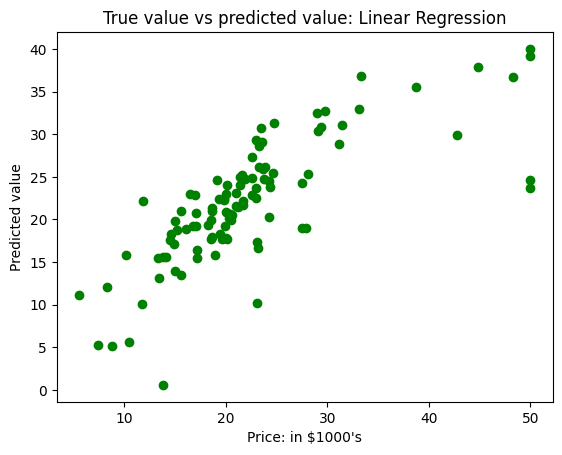

In [14]:
plt.scatter(y_test, y_pred, c='green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value: Linear Regression")
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Square Error:", mse)
print("Mean Absolute Error:", mae)

Mean Square Error: 33.44897999767653
Mean Absolute Error: 3.8429092204444966
